In [139]:
from qiskit import *
from qiskit.visualization import plot_histogram

## Zadanie 1 - gęste kodowanie

Wersja 1 - układ z zajęć

In [140]:
qnumber = 4

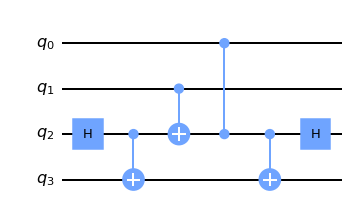

In [141]:
circ = QuantumCircuit(qnumber)

circ.h(2)
circ.cnot(2, 3)
circ.cnot(1, 2)
circ.cz(0, 2)
circ.cnot(2, 3)
circ.h(2)

circ.draw('mpl')

Wersja 2 - za tutorialem qiskit

In [142]:
def create_bell_pair():
    qc = QuantumCircuit(2)
    qc.h(1)
    qc.cx(1, 0)
    return qc

In [143]:
def encode_message(qc, qubit, bit1, bit0):
    if bit1 == 1:
        qc.x(qubit)
    if bit0 == 1:
        qc.z(qubit)
    return qc

In [144]:
def decode_message(qc):
    qc.cx(1, 0)
    qc.h(1)
    return qc

In [145]:
def create_superdense_coding(bit1, bit0):
    qc = create_bell_pair()
    qc.barrier()

    qc = encode_message(qc, qubit=1, bit1=bit1, bit0=bit0)
    qc.barrier()

    qc = decode_message(qc)
    qc.measure_all()
    return qc

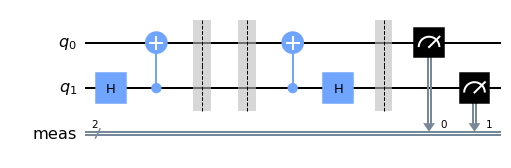

In [146]:
create_superdense_coding(0, 0).draw('mpl')

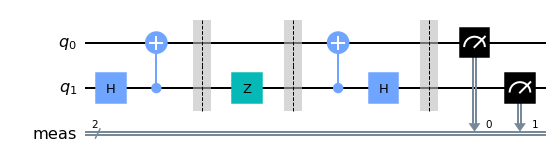

In [147]:
create_superdense_coding(0, 1).draw('mpl')

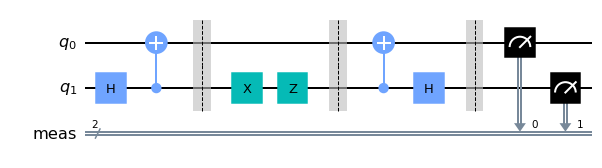

In [148]:
create_superdense_coding(1, 1).draw('mpl')

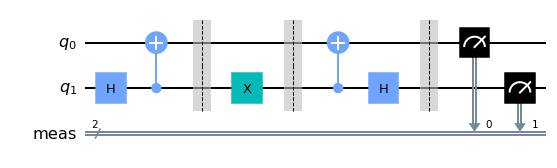

In [149]:
qc = create_superdense_coding(1, 0)
qc.draw('mpl')

{'01': 1024}


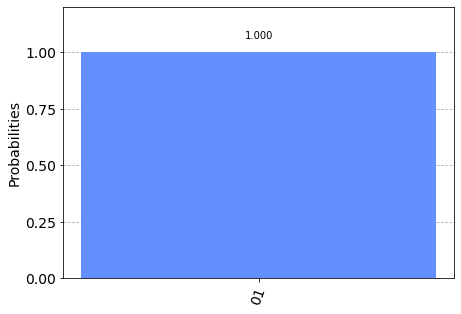

In [150]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

## Zadanie 2 - teleportacja

Wersja 1 - układ z zajęć

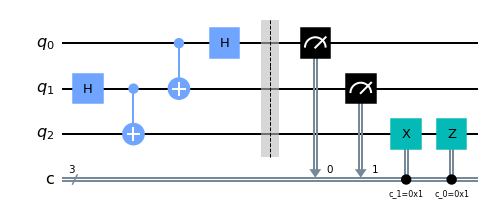

In [151]:
qnumber = 3
circ = QuantumCircuit(qnumber, qnumber)

circ.h(1)
circ.cnot(1, 2)
circ.cnot(0, 1)
circ.h(0)

circ.barrier()
circ.measure(0, 0) # mierzymy na bit o indeksie 0
circ.measure(1, 1) # mierzymy na bit o indeksie 1

circ.x(2).c_if(1, 1) # x jesli bit o indeksie 1 będzie 1
circ.z(2).c_if(0, 1) # z jesli bit o indeksie 0 bedzie 1

circ.draw('mpl')

In [152]:
def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a,b)

In [153]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

In [154]:
def measure_and_send(qc, a, b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [155]:
def bob_gates(qc, qubit, crz, crx):
    qc.x(qubit).c_if(crx, 1)
    qc.z(qubit).c_if(crz, 1)

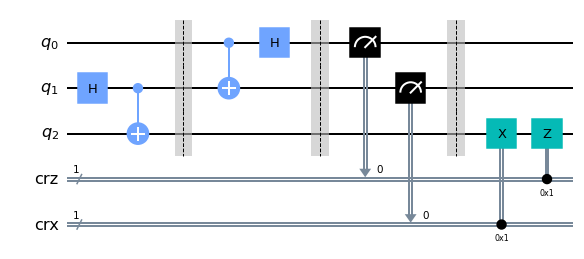

In [156]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

create_bell_pair(teleportation_circuit, 1, 2)

teleportation_circuit.barrier()
alice_gates(teleportation_circuit, 0, 1)

measure_and_send(teleportation_circuit, 0, 1)

teleportation_circuit.barrier()
bob_gates(teleportation_circuit, 2, crz, crx)
teleportation_circuit.draw('mpl')

<IPython.core.display.Latex object>

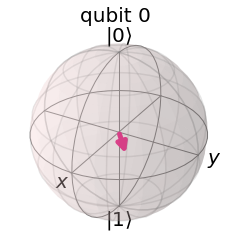

In [157]:
from qiskit.quantum_info import random_statevector
from qiskit.visualization import plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize

psi = random_statevector(2)

display(array_to_latex(psi, prefix="|\\psi\\rangle ="))
plot_bloch_multivector(psi)

In [160]:
def teleport(psi):
    init_gate = Initialize(psi)
    init_gate.label = "init"
    qr = QuantumRegister(3, name="q")
    crz = ClassicalRegister(1, name="crz")
    crx = ClassicalRegister(1, name="crx")
    qc = QuantumCircuit(qr, crz, crx)

    qc.append(init_gate, [0])
    qc.barrier()

    create_bell_pair(qc, 1, 2)
    qc.barrier()

    alice_gates(qc, 0, 1)
    measure_and_send(qc, 0, 1)

    bob_gates(qc, 2, crz, crx)
    return qc

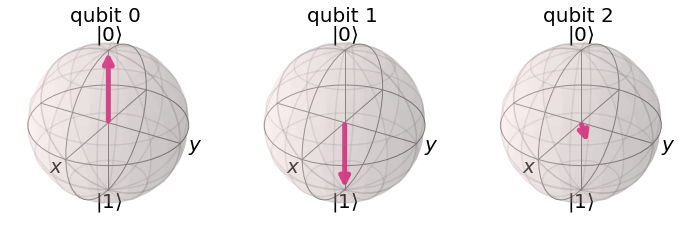

In [161]:
qc = teleport(psi)
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)